### Ipynb 2/3 visualizations
# Machine Learning Regression for proactive attack pattern detection in IoT networks

By **predicting** `flow_duration` **from basic network telemetry** in real-time IoT traffic, we can spot unusual resource use early and surface potential attack patterns before they escalate. This enables proactive capacity planning *(autoscaling, QoS tuning)* and faster security response, reducing downtime and operating costs while keeping connected devices reliable.

In line with **SDG 9 *(Industry, Innovation & Infrastructure)*** and **SDG 16 *(Peace, Justice & Strong Institutions)***, this approach strengthens digital infrastructure and improves cyber-resilience for services that increasingly depend on IoT.

**Impact:** Securing IoT networks helps keep critical infrastructure - such as smart cities, healthcare, and energy systems - safe and reliable. **Concretely,** this means hospital sensor networks remain stable and smart city street lighting is protected from attack-driven disruptions.

In [50]:
import pandas as pd
import sqlite3

# Path relative to the notebook
db_path = "../data/processed/rt_iot2022_processed.db"

# Load dataframe from the first table
with sqlite3.connect(db_path) as conn:
    tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
    table_name = tables.iloc[0,0]
    df_viz = pd.read_sql(f'SELECT * FROM "{table_name}";', conn)

print(f" Loaded from {db_path} | table: {table_name}")
print("Shape:", df_viz.shape)
display(df_viz.head())


 Loaded from ../data/processed/rt_iot2022_processed.db | table: flows_clean
Shape: (18129, 22)


,proto,service,flow_duration,fwd_pkts_tot,down_up_ratio,fwd_header_size_tot,bwd_header_size_min,flow_syn_flag_count,flow_rst_flag_count,flow_ack_flag_count,...,fwd_pkts_payload_std,bwd_pkts_payload_max,bwd_pkts_payload_avg,flow_pkts_payload_avg,fwd_iat_min,fwd_iat_std,bwd_iat_min,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes
0,tcp,mqtt,32.011598,9,0.555556,296,32,2,1,13,...,13.115936,23,6.4,7.714286,761.985779,10403073.63,4438.877106,3.0,1.666667,25.333333
1,tcp,mqtt,31.883584,9,0.555556,296,32,2,1,13,...,13.115936,23,6.4,7.714286,247.001648,10463455.56,4214.048386,3.0,1.666667,25.333333
2,tcp,mqtt,32.124053,9,0.555556,296,32,2,1,13,...,12.852799,21,6.0,7.428571,283.956528,10442377.92,2456.903458,3.0,1.666667,24.666667
3,tcp,mqtt,31.961063,9,0.555556,296,32,2,1,13,...,12.852799,21,6.0,7.428571,288.963318,10482528.22,3933.906555,3.0,1.666667,24.666667
4,tcp,mqtt,31.902362,9,0.555556,296,32,2,1,13,...,13.115936,23,6.4,7.714286,387.907028,10447019.10,3005.027771,3.0,1.666667,25.333333


### Target inspection: Flow duration

Before modeling, we first inspect the target variable `flow_duration`.  
We plot its raw distribution and also the log-transformed version (`log1p`).  
This helps us understand skewness, outliers, and whether a transformation might be needed  
to stabilize the variance for linear models.


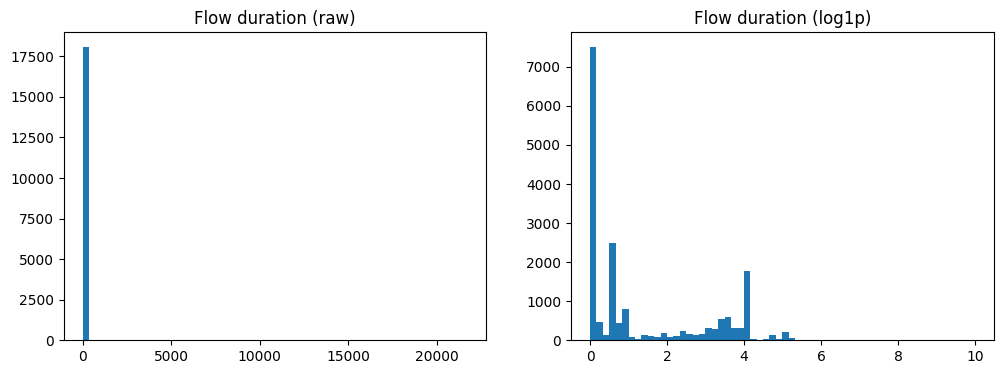

In [51]:
import matplotlib.pyplot as plt
import numpy as np

y = df_viz["flow_duration"]

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].hist(y, bins=60)
axes[0].set_title("Flow duration (raw)")
axes[1].hist(np.log1p(y), bins=60)
axes[1].set_title("Flow duration (log1p)")
plt.show()


### Conclusion

The raw distribution of `flow_duration` is extremely right-skewed:  
most flows are very short, while a small number of flows last much longer.  
This imbalance makes the raw target hard to model with linear methods.  

The log-transformed version spreads the data more evenly and reveals clearer patterns,  
while still keeping short and long flows visible.  

**Implication:** For tree-based models (Random Forest, XGBoost) we can use the raw target,  
but for linear models (Ridge, Lasso) we will likely need the `log1p`-transformed target.  
